In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl

In [4]:
import os
import urllib.request

if not os.path.exists('data'):
    os.mkdir('data')

urllib.request.urlretrieve('https://www.gutenberg.org/files/2591/2591-0.txt', 'data/grimms_fairy_tales.txt')
urllib.request.urlretrieve('http://www.gutenberg.org/cache/epub/345/pg345.txt', 'data/dracula.txt')
urllib.request.urlretrieve('http://www.gutenberg.org/files/2701/2701-0.txt', 'data/moby_dick.txt')
urllib.request.urlretrieve('http://www.gutenberg.org/files/74/74-0.txt', 'data/tom_sawyer.txt')
urllib.request.urlretrieve('http://www.gutenberg.org/files/2600/2600-0.txt', 'data/war_and_peace.txt');

In [5]:
# Just making the plots look better
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [8]:
books = glob.glob('data/*.txt')
d = list()
for book_file in books:
    with open(book_file, encoding='utf-8') as f:
        book = os.path.basename(book_file.split('.')[0])
        d.append(pd.DataFrame({'book': book, 'lines': f.readlines()}))
doc = pd.concat(d)
doc.head()

,book,lines
0,war_and_peace,﻿\n
1,war_and_peace,"The Project Gutenberg EBook of War and Peace, ..."
2,war_and_peace,\n
3,war_and_peace,This eBook is for the use of anyone anywhere a...
4,war_and_peace,"no restrictions whatsoever. You may copy it, g..."


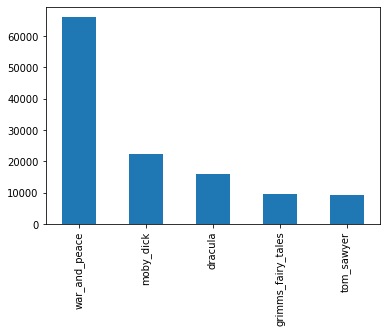

In [11]:
doc['book'].value_counts().plot.bar();

In [13]:
doc['words'] = doc.lines.str.strip().str.split('[\W_]+')
doc.head()

,book,lines,words
0,war_and_peace,﻿\n,"[, ]"
1,war_and_peace,"The Project Gutenberg EBook of War and Peace, ...","[The, Project, Gutenberg, EBook, of, War, and,..."
2,war_and_peace,\n,[]
3,war_and_peace,This eBook is for the use of anyone anywhere a...,"[This, eBook, is, for, the, use, of, anyone, a..."
4,war_and_peace,"no restrictions whatsoever. You may copy it, g...","[no, restrictions, whatsoever, You, may, copy,..."


In [14]:
rows = list()
for row in doc[['book', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.book, word))

words = pd.DataFrame(rows, columns=['book', 'word'])
words.head()

,book,word
0,war_and_peace,
1,war_and_peace,
2,war_and_peace,The
3,war_and_peace,Project
4,war_and_peace,Gutenberg


In [15]:
words = words[words.word.str.len() > 0]
words.head()


,book,word
2,war_and_peace,The
3,war_and_peace,Project
4,war_and_peace,Gutenberg
5,war_and_peace,EBook
6,war_and_peace,of


In [16]:
words['word'] = words.word.str.lower()
words.head()


,book,word
2,war_and_peace,the
3,war_and_peace,project
4,war_and_peace,gutenberg
5,war_and_peace,ebook
6,war_and_peace,of


In [18]:
counts = words.groupby('book').word.value_counts().to_frame().rename(columns={'word':'n_w'})
counts.head()


n_w
book    word      
dracula the   8093
        and   5976
        i     4847
        to    4745
        of    3748

n_w
book               word       
dracula            the    8093
                   and    5976
                   i      4847
                   to     4745
                   of     3748
grimms_fairy_tales the    7223
                   and    5551
                   to     2749
                   he     2096
                   a      1978
moby_dick          the   14715
                   of     6742
                   and    6517
                   a      4805
                   to     4707
tom_sawyer         the    3973
                   and    3193
                   a      1955
                   to     1807
                   of     1585
war_and_peace      the   34725
                   and   22307
                   to    16755
                   of    15008
                   a     10584

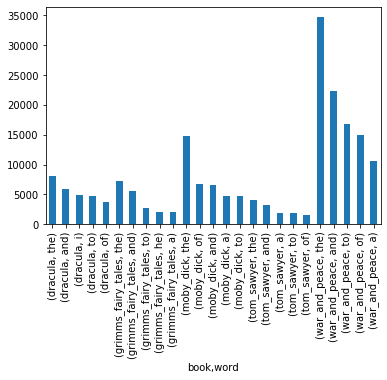

In [19]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])


In [20]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
book,
dracula,166916
grimms_fairy_tales,105335
moby_dick,222617
tom_sawyer,77612
war_and_peace,576629


In [21]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()

n_w     n_d        tf
book    word                        
dracula the   8093  166916  0.048485
        and   5976  166916  0.035802
        i     4847  166916  0.029039
        to    4745  166916  0.028427
        of    3748  166916  0.022454

tf
book               word          
dracula            the   0.048485
                   and   0.035802
                   i     0.029039
                   to    0.028427
                   of    0.022454
grimms_fairy_tales the   0.068572
                   and   0.052699
                   to    0.026098
                   he    0.019898
                   a     0.018778
moby_dick          the   0.066100
                   of    0.030285
                   and   0.029274
                   a     0.021584
                   to    0.021144
tom_sawyer         the   0.051191
                   and   0.041141
                   a     0.025189
                   to    0.023282
                   of    0.020422
war_and_peace      the   0.060221
                   and   0.038685
                   to    0.029057
                   of    0.026027
                   a     0.018355

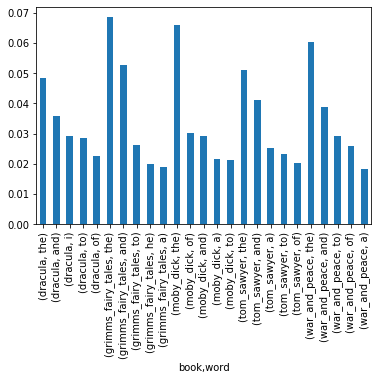

In [22]:
pretty_plot_top_n(tf['tf'])